In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import multimode
from sklearn.model_selection import train_test_split

In [3]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
abalone = pd.read_csv(url, header = None)

In [4]:
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight"
                , "Viscera weight", "Shell weight", "Rings"]

abalone.columns = column_names

In [5]:
abalone = abalone.drop(columns = "Sex")
abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
X = abalone.drop(columns = "Rings")
y = abalone["Rings"]
X_train, X_test, y_train, y_test = train_test_split(
                                abalone.drop(columns = "Rings"), abalone["Rings"], test_size = 0.3, random_state = 333)


In [7]:


#Physical measurements for new abalone
abalone_new = {
    "Length": [0.569552],
    "Diameter": [0.446407],
    "Height": [0.154437],
    "Whole weight": [1.016849],
    "Shucked weight": [0.439051],
    "Viscera weight": [0.222526],
    "Shell weight": [0.291208]
}

#converting into a pandas dataframe
abalone_new = pd.DataFrame(abalone_new)
abalone_new


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208


In [8]:
#defining a mode function that returns random values when there are multiple modes
def mode(arr):
    np.random.seed(123)
    if len(multimode(arr)) ==1:
        return multimode(arr)[0]
    
    else:
        return np.random.choice(multimode(arr))

In [9]:

distances = []
for rows in range(len(X_train)):
    #calculating the euclidean distance between each row of X_train with the new abalone
    distances.append(np.linalg.norm(X_train.iloc[rows] - abalone_new.iloc[0]))


distances = np.array(distances)

#returning the closest 3 neighbours to abalone_new
idx_min_3 = np.argsort(distances)[:3]

#caluclating the mode of the age of the 3 closest neighbours
ages_min_3 = y_train.iloc[idx_min_3]
#predicted_age = ages_min_3.mode().values[0]
predicted_age = mode(ages_min_3)
predicted_age

11

In [10]:
predicted_ages_test = []

#converting to np array for faster computation
X_train_np = X_train.values

for i in range(len(X_test)):

    #converting to np array for faster computation
    x_test_row = X_test.iloc[i].values
    
    #computing the euclidean norm between X_train and X_test
    distances = np.linalg.norm(X_train_np - x_test_row, axis = 1)
    
    #finding the closest neighbours to x_test_row
    idx_min_3 = np.argsort(distances)[:3]
    
    ages_min_3 = y_train.iloc[idx_min_3]
    
    predicted_ages_test.append(mode(ages_min_3))


We calculate the Mean-Squared-Error using the following formula
$$
    \text{MSE} = \frac{1}{M} \sum_{j=0}^{M-1} \left( \text{predicted_ages_test}[j] - \text{y_test}[j] \right)^2
$$

In [11]:
#calculating the mean squared errpr
mean_squared_error = (np.linalg.norm(predicted_ages_test - y_test))**2/len(y_test)
mean_squared_error


7.515948963317386

In [12]:
def knn(X_train, X_test, k):
    predicted_ages_test = []

#converting to np array for faster computation
    X_train_np = X_train.values

    for i in range(len(X_test)):

        #converting to np array for faster computation
        x_test_row = X_test.iloc[i].values
    
        #computing the euclidean norm between X_train and X_test
        distances = np.linalg.norm(X_train_np - x_test_row, axis = 1)
    
        #finding the closest neighbours to x_test_row
        idx_min_k = np.argsort(distances)[:k]
        
        
        ages_min_k = y_train.iloc[idx_min_k]
        
        #calculating the predicted age by taking the mode of the nearest k neighbours
        predicted_age = mode(ages_min_k)

        predicted_ages_test.append(predicted_age)
        
    predicted_ages_test = np.array(predicted_ages_test)
    return predicted_ages_test
    #y_test_np = y_test.values
    
    #mean_squared_error = np.mean((predicted_ages_test - y_test_np) ** 2)
    #return mean_squared_error
    

In [13]:
def calculate_mse(arr1, arr2):
    return np.mean((arr1 - arr2)**2)

In [14]:
#function to run knn from values 1 to 50
def optimal_k(X_train, X_test):
    mse_values = []
    for k in range(1, 51):
        predicted_ages = knn(X_train, X_test, k)
        mse_k = calculate_mse(predicted_ages, y_test.values)
        mse_values.append(mse_k)
    mse_values = np.array(mse_values)
    return mse_values

#### Tuning $k$ to Achieve Optimal Performance
Vary $k$ from 1 to 50, and compute the MSE value for each $k$. Store the MSE values in an array named mse_values. Generate
a plot of $k$ values on the $x$‑axis and mse_values on the $y$‑axis. From the plot, report an optimal value of $k$ at which MSE is
the smallest. If there are multiple optimal values for $k$, you may pick any one at random. Also report the MSE corresponding
to this optimal value of $k$.

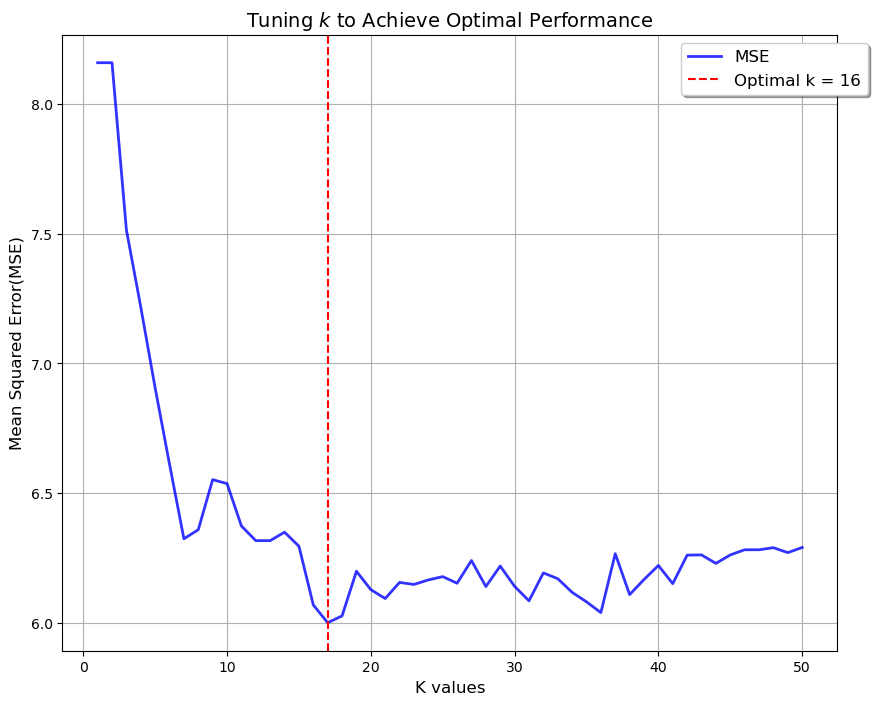

In [15]:

xvals = np.arange(1, 51)
yvals = optimal_k(X_train, X_test)

#calculating optimal value of k
min_index = np.argmin(yvals)
minx = xvals[min_index]
miny = yvals[min_index]

#plotting
plt.figure(figsize = (10, 8))
plt.plot(xvals, yvals, color = "blue",  linewidth=2, markersize=6, alpha=0.8, label = "MSE")
plt.axvline(x = minx, c = "r", linestyle = "dashed", label = f"Optimal k = {min_index}")
plt.xlabel("K values", fontsize=12)
plt.ylabel("Mean Squared Error(MSE)", fontsize=12)
plt.title(f"Tuning $k$ to Achieve Optimal Performance", fontsize = 14)
plt.legend(fontsize=12, frameon=True, shadow=True, loc="upper right", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.savefig("MSE_vs_K")

## Observations
Initial High Error: For very small values of 
$k$, the MSE is high, likely due to high variance (overfitting) when very few neighbors are considered. </br>
Optimal $k=16$, indicating the optimal trade-off between bias and variance




